In [14]:
# import necessary packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LassoLarsCV
from sklearn.model_selection import train_test_split
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


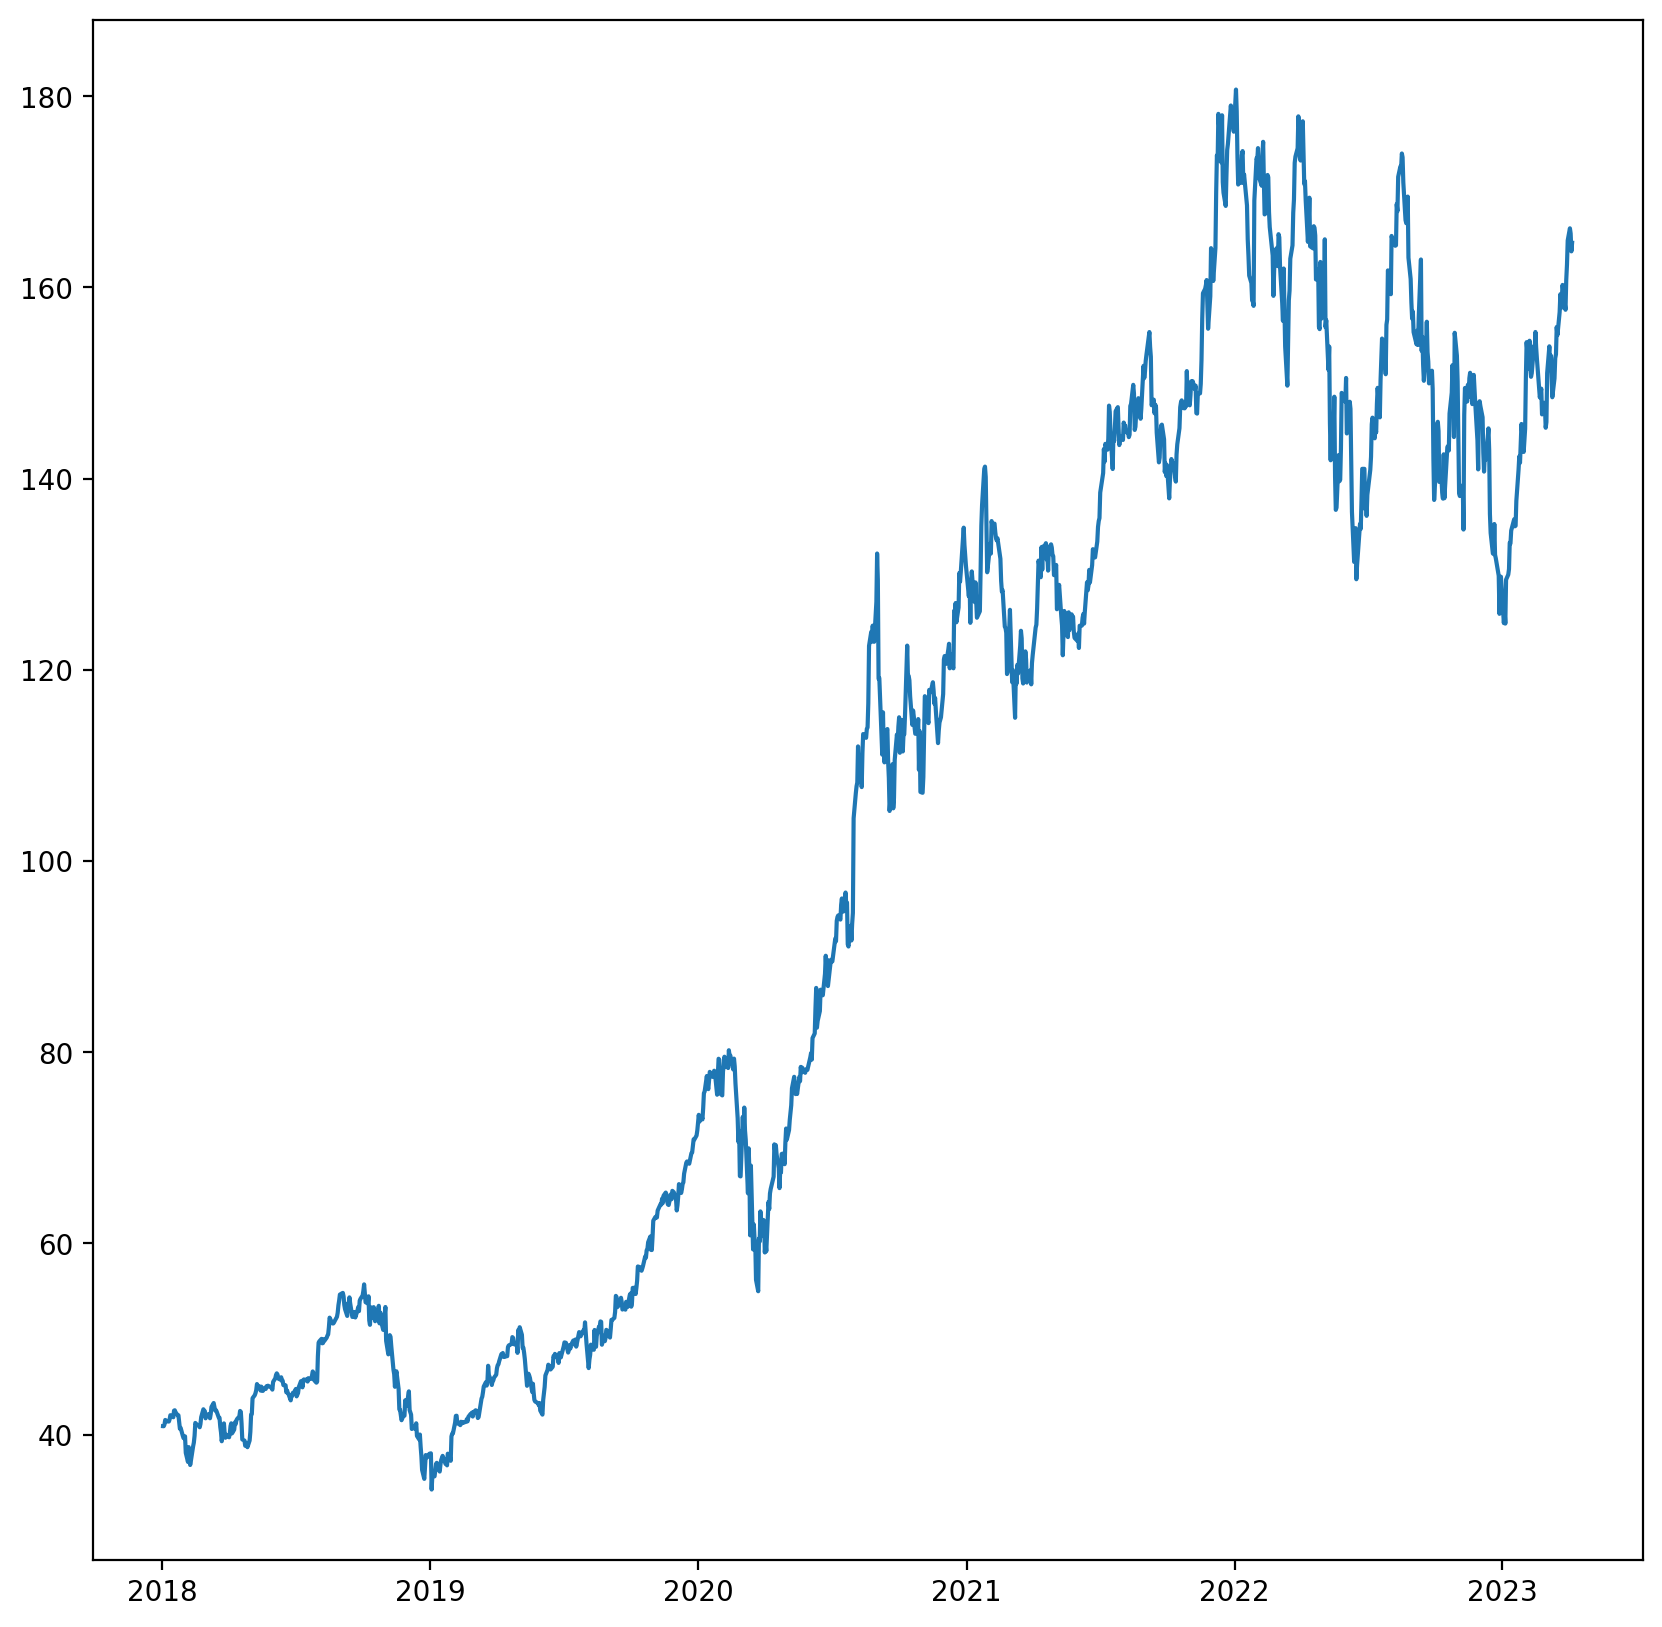

In [13]:
# download the stock data from 2018 until now
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime.today()
appl = yf.download('AAPL', start, end)['Adj Close']

fig, ax = plt.subplots(figsize=(10,10), dpi=200)
ax.plot(appl.index, appl, label='Adj Close')

In [18]:
appl.isnull().sum()

0

In [33]:
X = (appl.index - start).days.reshape(-1, 1) # convert dates to numerical features
y = appl.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

AttributeError: 'Int64Index' object has no attribute 'reshape'

In [32]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[1.6031520e+18 1.5361056e+18 1.5488064e+18 ... 1.6771104e+18 1.6226784e+18
 1.6559424e+18].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [29]:
y

array([ 40.88807678,  40.8809433 ,  41.07083511, ..., 165.63000488,
       163.75999451, 164.66000366])

[*********************100%***********************]  1 of 1 completed


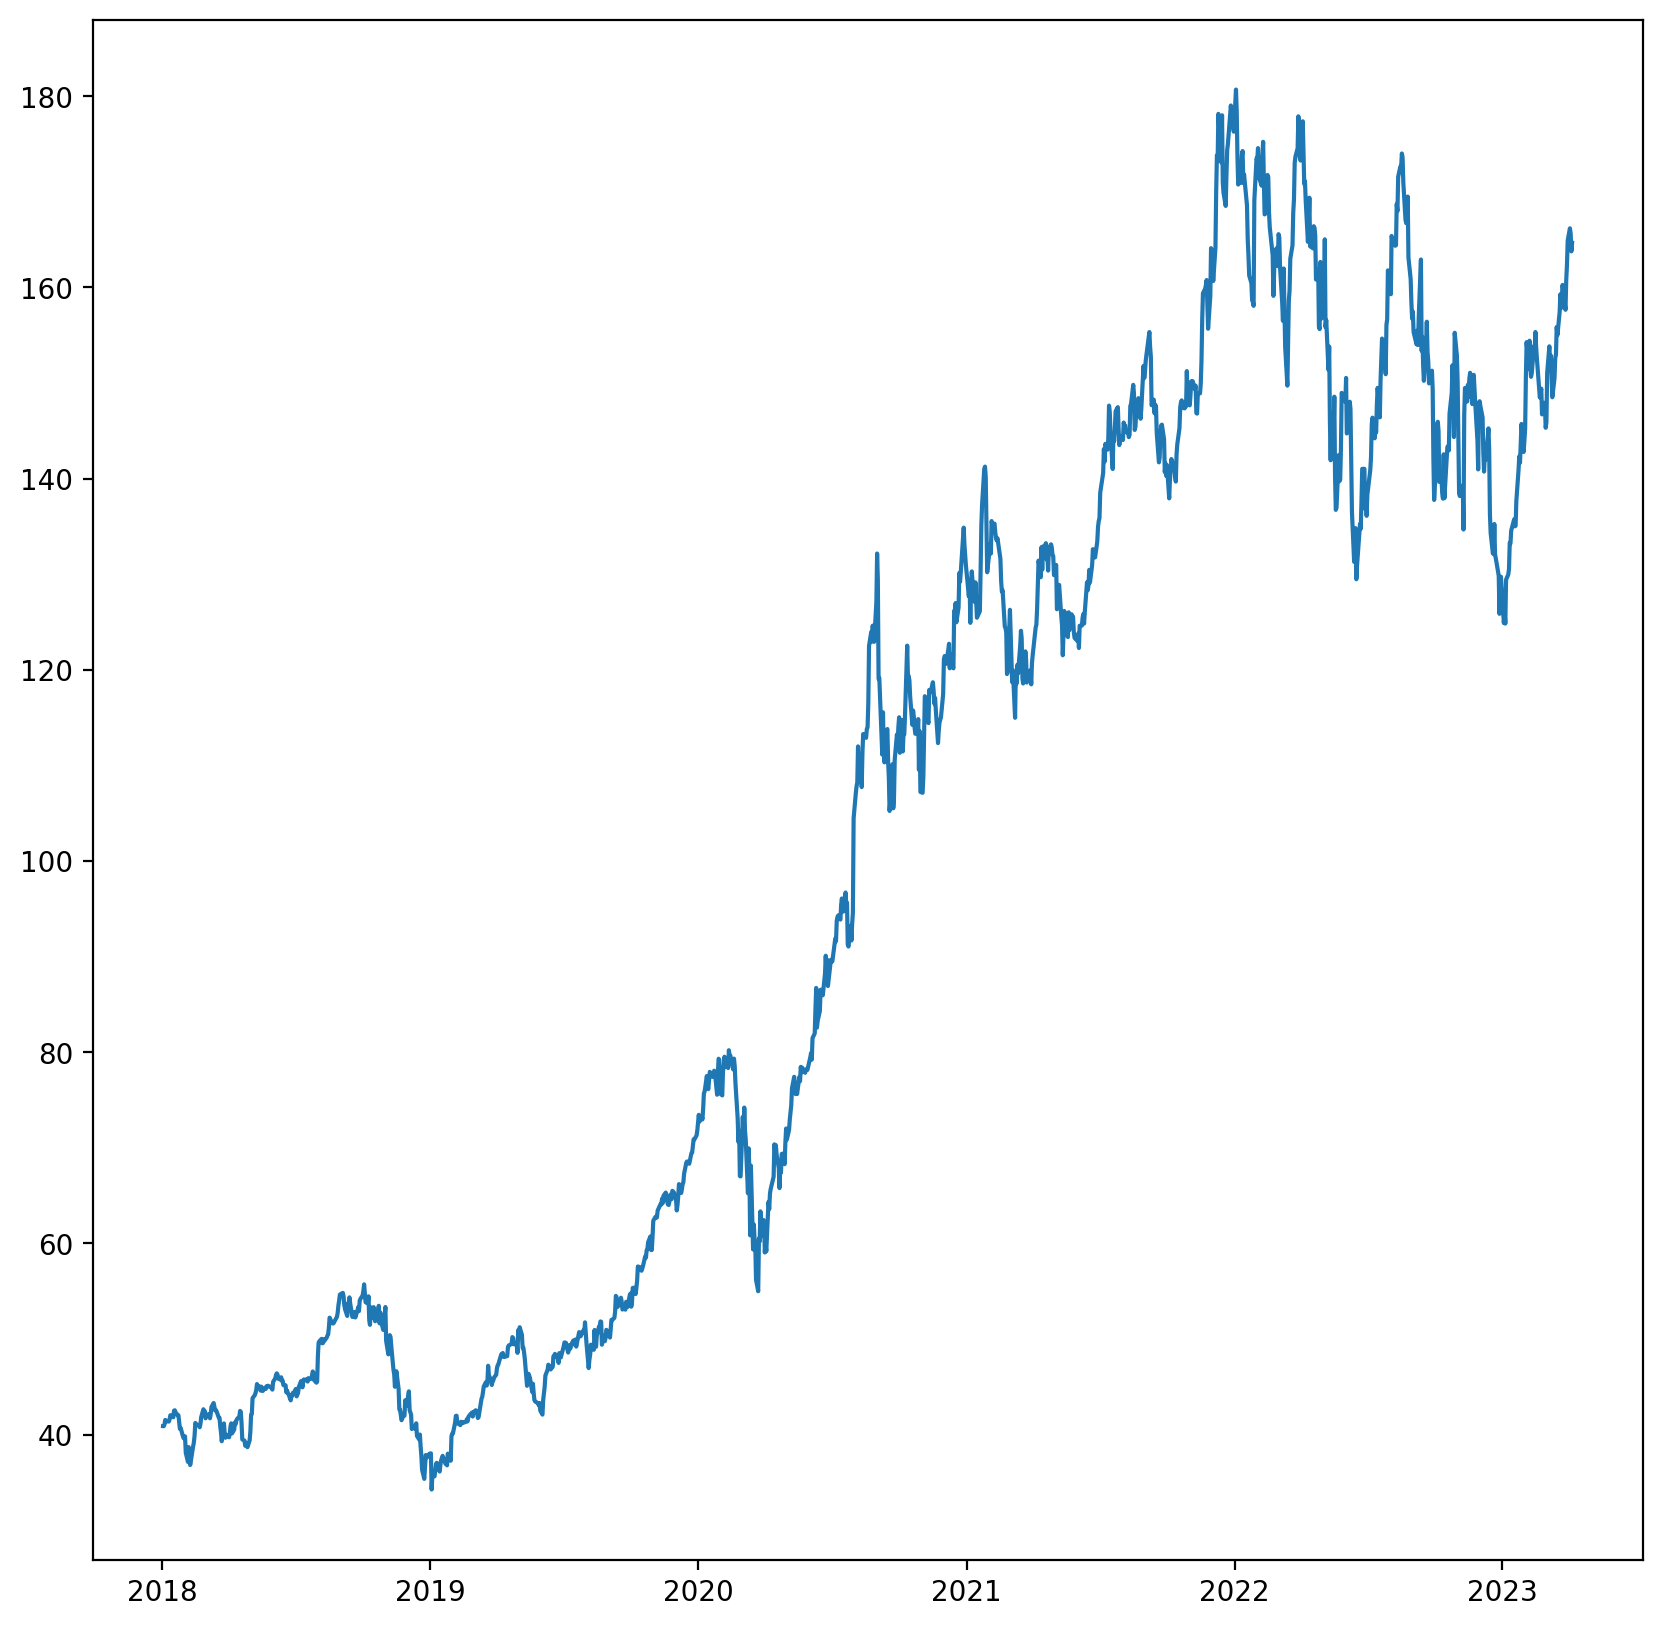

In [40]:
# import necessary packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LassoLarsCV
from sklearn.model_selection import train_test_split
import yfinance as yf

# download the stock data from 2018 until now
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime.today()
appl = yf.download('AAPL', start, end)['Adj Close']

fig, ax = plt.subplots(figsize=(10,10), dpi=200)
ax.plot(appl.index, appl, label='Adj Close')
plt.savefig('images/appl.png')

X = (appl.index - start).days.values.reshape(-1, 1) # convert dates to numerical features
y = appl.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

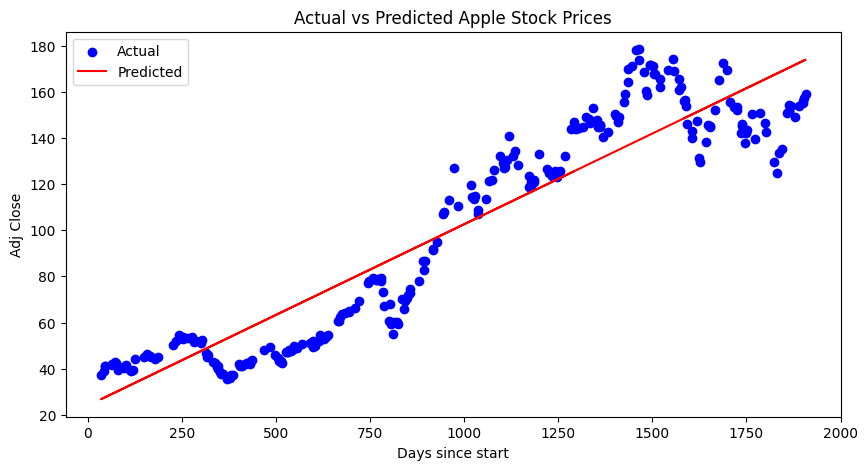

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X_test, y_test, color='blue', label='Actual')
ax.plot(X_test, ridge_pred, color='red', label='Predicted')
ax.legend()
ax.set_xlabel('Days since start')
ax.set_ylabel('Adj Close')
ax.set_title('Actual vs Predicted Apple Stock Prices')
# save image
plt.savefig('images/apple_ridge.png')

plt.show()